<a href="https://colab.research.google.com/github/akanupam/ML_learings/blob/main/Churn_prediction_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Data Preparation


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
link = "https://raw.githubusercontent.com/akanupam/Datasets/refs/heads/main/WA_Fn-UseC_-Telco-Customer-Churn%20(1).csv"

In [ ]:
data = pd.read_csv(link)

In [ ]:
df = pd.DataFrame(data)
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
df.head().T

,0,1,2,3,4
customerID,7590-VHVEG,5575-GNVDE,3668-QPYBK,7795-CFOCW,9237-HQITU
gender,Female,Male,Male,Male,Female
SeniorCitizen,0,0,0,0,0
Partner,Yes,No,No,No,No
Dependents,No,No,No,No,No
tenure,1,34,2,45,2
PhoneService,No,Yes,Yes,No,Yes
MultipleLines,No phone service,No,No,No phone service,No
InternetService,DSL,DSL,DSL,DSL,Fiber optic
OnlineSecurity,No,Yes,Yes,Yes,No


In [ ]:
df.columns = df.columns.str.lower().str.replace(' ','_')
categorical_columns = list(df.dtypes[df.dtypes == 'object'].index)
for c in categorical_columns:
  df[c] = df[c].str.lower().str.replace(' ','_')

categorical_columns

['customerid',
 'gender',
 'partner',
 'dependents',
 'phoneservice',
 'multiplelines',
 'internetservice',
 'onlinesecurity',
 'onlinebackup',
 'deviceprotection',
 'techsupport',
 'streamingtv',
 'streamingmovies',
 'contract',
 'paperlessbilling',
 'paymentmethod',
 'totalcharges',
 'churn']

In [ ]:
df.head().T

,0,1,2,3,4
customerid,7590-vhveg,5575-gnvde,3668-qpybk,7795-cfocw,9237-hqitu
gender,female,male,male,male,female
seniorcitizen,0,0,0,0,0
partner,yes,no,no,no,no
dependents,no,no,no,no,no
tenure,1,34,2,45,2
phoneservice,no,yes,yes,no,yes
multiplelines,no_phone_service,no,no,no_phone_service,no
internetservice,dsl,dsl,dsl,dsl,fiber_optic
onlinesecurity,no,yes,yes,yes,no


In [ ]:
df.dtypes

,0
customerid,object
gender,object
seniorcitizen,int64
partner,object
dependents,object
tenure,int64
phoneservice,object
multiplelines,object
internetservice,object
onlinesecurity,object


In [ ]:
tc = pd.to_numeric(df.totalcharges, errors = 'coerce')


In [ ]:
df.totalcharges = pd.to_numeric(df.totalcharges, errors = 'coerce')

In [ ]:
df.totalcharges = df.totalcharges.fillna(0)

In [ ]:
df[tc.isnull()][['customerid','totalcharges']]

,customerid,totalcharges
488,4472-lvygi,0.0
753,3115-czmzd,0.0
936,5709-lvoeq,0.0
1082,4367-nuyao,0.0
1340,1371-dwpaz,0.0
3331,7644-omvmy,0.0
3826,3213-vvolg,0.0
4380,2520-sgtta,0.0
5218,2923-arzlg,0.0
6670,4075-wkniu,0.0


In [ ]:
df.churn = (df.churn == 'yes').astype(int)

In [ ]:
df.churn

,churn
0,0
1,0
2,1
3,0
4,1
...,...
7038,0
7039,0
7040,0
7041,1


#Setting up Validation Framework


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
df_fulltrain, df_test = train_test_split(df, test_size = 0.2, random_state = 1)

In [ ]:
len(df_fulltrain),len(df_test)

(5634, 1409)

In [ ]:
df_train, df_val = train_test_split(df_fulltrain, test_size = 0.25, random_state=1)

In [ ]:
len(df_train), len(df_test), len(df_val)

(4225, 1409, 1409)

In [ ]:
df_train = df_train.reset_index(drop = True)
df_val = df_val.reset_index(drop = True)
df_test = df_train.reset_index(drop = True)

In [ ]:
y_train = df_train.churn.values
y_val = df_val.churn.values
y_test = df_test.churn.values

In [ ]:
del df_train['churn']
del df_val['churn']
del df_test['churn']

#Exploratory Data Analysis

In [ ]:
df_fulltrain = df_fulltrain.reset_index(drop = True)

In [ ]:
df_fulltrain.churn.value_counts(normalize=True)

,proportion
churn,
0,0.730032
1,0.269968


In [ ]:
global_churn_rate = df_fulltrain.churn.mean()

In [ ]:
round(global_churn_rate,2)

np.float64(0.27)

In [ ]:
numerical = ['tenure', 'monthlycharges', 'totalcharges']

In [ ]:
df_fulltrain.columns

Index(['customerid', 'gender', 'seniorcitizen', 'partner', 'dependents',
       'tenure', 'phoneservice', 'multiplelines', 'internetservice',
       'onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport',
       'streamingtv', 'streamingmovies', 'contract', 'paperlessbilling',
       'paymentmethod', 'monthlycharges', 'totalcharges', 'churn'],
      dtype='object')

In [ ]:
categorical = [ 'gender', 'seniorcitizen', 'partner', 'dependents',
       'phoneservice', 'multiplelines', 'internetservice',
       'onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport',
       'streamingtv', 'streamingmovies', 'contract', 'paperlessbilling',
       'paymentmethod', ]

In [ ]:
df_fulltrain[categorical].nunique()

,0
gender,2
seniorcitizen,2
partner,2
dependents,2
phoneservice,2
multiplelines,3
internetservice,3
onlinesecurity,3
onlinebackup,3
deviceprotection,3


#Feature Importance

In [ ]:
churn_female = df_fulltrain[df_fulltrain.gender=='female'].churn.mean()
churn_female

np.float64(0.27682403433476394)

In [ ]:
churn_male = df_fulltrain[df_fulltrain.gender=='male'].churn.mean()
churn_male

np.float64(0.2632135306553911)

In [ ]:
churn_no_partner = df_fulltrain[df_fulltrain.partner=='no'].churn.mean()
churn_no_partner

np.float64(0.3298090040927694)

In [ ]:
churn_with_partner = df_fulltrain[df_fulltrain.partner=='yes'].churn.mean()
churn_with_partner

np.float64(0.20503330866025166)

In [ ]:
global_churn = df_fulltrain.churn.mean()
global_churn

np.float64(0.26996805111821087)

In [ ]:
global_churn - churn_with_partner

np.float64(0.06493474245795922)

In [ ]:
global_churn - churn_male

np.float64(0.006754520462819769)

Risk ratio

In [ ]:
churn_with_partner/global_churn

np.float64(0.7594724924338315)

In [ ]:
churn_no_partner/global_churn

np.float64(1.2216593879412643)

In [ ]:
from IPython.display import display

In [ ]:
for c in categorical:
  print(c)
  df_group = df_fulltrain.groupby(c).churn.agg(['mean','count'])
  df_group['diff'] = df_group['mean'] - global_churn
  df_group['risk'] = df_group['mean'] / global_churn
  display(df_group)
  print()
  print()

gender


,mean,count,diff,risk
gender,,,,
female,0.276824,2796,0.006856,1.025396
male,0.263214,2838,-0.006755,0.974980




seniorcitizen


,mean,count,diff,risk
seniorcitizen,,,,
0,0.242270,4722,-0.027698,0.897403
1,0.413377,912,0.143409,1.531208




partner


,mean,count,diff,risk
partner,,,,
no,0.329809,2932,0.059841,1.221659
yes,0.205033,2702,-0.064935,0.759472




dependents


,mean,count,diff,risk
dependents,,,,
no,0.313760,3968,0.043792,1.162212
yes,0.165666,1666,-0.104302,0.613651




phoneservice


,mean,count,diff,risk
phoneservice,,,,
no,0.241316,547,-0.028652,0.893870
yes,0.273049,5087,0.003081,1.011412




multiplelines


,mean,count,diff,risk
multiplelines,,,,
no,0.257407,2700,-0.012561,0.953474
no_phone_service,0.241316,547,-0.028652,0.893870
yes,0.290742,2387,0.020773,1.076948




internetservice


,mean,count,diff,risk
internetservice,,,,
dsl,0.192347,1934,-0.077621,0.712482
fiber_optic,0.425171,2479,0.155203,1.574895
no,0.077805,1221,-0.192163,0.288201




onlinesecurity


,mean,count,diff,risk
onlinesecurity,,,,
no,0.420921,2801,0.150953,1.559152
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.153226,1612,-0.116742,0.567570




onlinebackup


,mean,count,diff,risk
onlinebackup,,,,
no,0.404323,2498,0.134355,1.497672
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.217232,1915,-0.052736,0.804660




deviceprotection


,mean,count,diff,risk
deviceprotection,,,,
no,0.395875,2473,0.125907,1.466379
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.230412,1940,-0.039556,0.853480




techsupport


,mean,count,diff,risk
techsupport,,,,
no,0.418914,2781,0.148946,1.551717
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.159926,1632,-0.110042,0.592390




streamingtv


,mean,count,diff,risk
streamingtv,,,,
no,0.342832,2246,0.072864,1.269897
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.302723,2167,0.032755,1.121328




streamingmovies


,mean,count,diff,risk
streamingmovies,,,,
no,0.338906,2213,0.068938,1.255358
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.307273,2200,0.037305,1.138182




contract


,mean,count,diff,risk
contract,,,,
month-to-month,0.431701,3104,0.161733,1.599082
one_year,0.120573,1186,-0.149395,0.446621
two_year,0.028274,1344,-0.241694,0.104730




paperlessbilling


,mean,count,diff,risk
paperlessbilling,,,,
no,0.172071,2313,-0.097897,0.637375
yes,0.338151,3321,0.068183,1.252560




paymentmethod


,mean,count,diff,risk
paymentmethod,,,,
bank_transfer_(automatic),0.168171,1219,-0.101797,0.622928
credit_card_(automatic),0.164339,1217,-0.105630,0.608733
electronic_check,0.455890,1893,0.185922,1.688682
mailed_check,0.193870,1305,-0.076098,0.718121


#Mutual Information

Mutual information - concept from information theory, it tells us how much we can learn about one variable if we know the value of another

In [ ]:
from sklearn.metrics import mutual_info_score

In [ ]:
mutual_info_score(df_fulltrain.churn,df_fulltrain.partner)

np.float64(0.009967689095399745)

In [ ]:
def mutual_info_churn(series):
  return mutual_info_score(df_fulltrain.churn,series)

In [ ]:
mu_info = df_fulltrain[categorical].apply(mutual_info_churn)
mu_info.sort_values(ascending=False)

,0
contract,0.098320
onlinesecurity,0.063085
techsupport,0.061032
internetservice,0.055868
onlinebackup,0.046923
deviceprotection,0.043453
paymentmethod,0.043210
streamingtv,0.031853
streamingmovies,0.031581
paperlessbilling,0.017589


#Correlation


In [ ]:
df_fulltrain.tenure.max()

72

In [ ]:
df_fulltrain[numerical].corrwith(df_fulltrain.churn).abs()

,0
tenure,0.351885
monthlycharges,0.196805
totalcharges,0.196353


In [ ]:
df_fulltrain[df_fulltrain.tenure <=2].churn.mean()

np.float64(0.5953420669577875)

In [ ]:
df_fulltrain[(df_fulltrain.tenure > 2) & (df_fulltrain.tenure <=12)].churn.mean()

np.float64(0.3994413407821229)

In [ ]:
df_fulltrain[df_fulltrain.tenure > 12].churn.mean()

np.float64(0.17634908339788277)

In [ ]:
df_fulltrain[df_fulltrain.monthlycharges <= 20].churn.mean()

np.float64(0.08795411089866156)

In [ ]:
df_fulltrain[(df_fulltrain.monthlycharges > 20) & (df_fulltrain.monthlycharges <= 50)].churn.mean()

np.float64(0.18340943683409436)

In [ ]:
df_fulltrain[df_fulltrain.monthlycharges > 50].churn.mean()

np.float64(0.32499341585462205)

#One hot coding

In [ ]:
from sklearn.feature_extraction import DictVectorizer

In [ ]:
dv = DictVectorizer()
train_dict = df_train[categorical + numerical].to_dict(orient = 'records')


In [ ]:
X_train = dv.fit_transform(train_dict)

In [ ]:
val_dict = df_val[categorical + numerical].to_dict(orient = 'records')

In [ ]:
X_val = dv.transform(val_dict)


#Training Logistic Regression with Scikit-Learn

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
model = LogisticRegression()
model.fit(X_train, y_train)


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
model.intercept_[0]

np.float64(-0.10908292225664346)

In [ ]:
model.coef_[0].round(3)

array([ 0.475, -0.175, -0.408, -0.03 , -0.078,  0.063, -0.089, -0.081,
       -0.034, -0.073, -0.335,  0.316, -0.089,  0.004, -0.258,  0.142,
        0.009,  0.063, -0.089, -0.081,  0.266, -0.089, -0.284, -0.231,
        0.123, -0.166,  0.058, -0.087, -0.032,  0.07 , -0.059,  0.142,
       -0.249,  0.215, -0.12 , -0.089,  0.102, -0.071, -0.089,  0.052,
        0.213, -0.089, -0.232, -0.07 ,  0.   ])

In [ ]:
y_pred = model.predict_proba(X_val)[:,1]

In [ ]:
churn_decision = (y_pred >= 0.5)

In [ ]:
(y_val == churn_decision).mean()

np.float64(0.8034066713981547)

In [ ]:
df_pred = pd.DataFrame()
df_pred['probablity'] = y_pred
df_pred['prediction'] = churn_decision.astype(int)
df_pred['actual'] = y_val

In [ ]:
df_pred['correct'] = df_pred.prediction == df_pred.actual

In [ ]:
df_pred.correct.mean()

np.float64(0.8034066713981547)

In [ ]:
churn_decision.astype(int)

array([0, 0, 0, ..., 0, 1, 1])

#Model Interpretation

In [ ]:
a = [1,2,3,4]
b = 'abcd'

In [ ]:
dict(zip(a,b))

{1: 'a', 2: 'b', 3: 'c', 4: 'd'}

In [ ]:
dict(zip(dv.get_feature_names_out(), model.coef_[0].round(3)))

{'contract=month-to-month': np.float64(0.475),
 'contract=one_year': np.float64(-0.175),
 'contract=two_year': np.float64(-0.408),
 'dependents=no': np.float64(-0.03),
 'dependents=yes': np.float64(-0.078),
 'deviceprotection=no': np.float64(0.063),
 'deviceprotection=no_internet_service': np.float64(-0.089),
 'deviceprotection=yes': np.float64(-0.081),
 'gender=female': np.float64(-0.034),
 'gender=male': np.float64(-0.073),
 'internetservice=dsl': np.float64(-0.335),
 'internetservice=fiber_optic': np.float64(0.316),
 'internetservice=no': np.float64(-0.089),
 'monthlycharges': np.float64(0.004),
 'multiplelines=no': np.float64(-0.258),
 'multiplelines=no_phone_service': np.float64(0.142),
 'multiplelines=yes': np.float64(0.009),
 'onlinebackup=no': np.float64(0.063),
 'onlinebackup=no_internet_service': np.float64(-0.089),
 'onlinebackup=yes': np.float64(-0.081),
 'onlinesecurity=no': np.float64(0.266),
 'onlinesecurity=no_internet_service': np.float64(-0.089),
 'onlinesecurity=yes'

In [ ]:
small = ['contract','tenure','monthlycharges']

In [ ]:
df_train[small].iloc[:10].to_dict(orient='records')

[{'contract': 'two_year', 'tenure': 72, 'monthlycharges': 115.5},
 {'contract': 'month-to-month', 'tenure': 10, 'monthlycharges': 95.25},
 {'contract': 'month-to-month', 'tenure': 5, 'monthlycharges': 75.55},
 {'contract': 'month-to-month', 'tenure': 5, 'monthlycharges': 80.85},
 {'contract': 'two_year', 'tenure': 18, 'monthlycharges': 20.1},
 {'contract': 'month-to-month', 'tenure': 4, 'monthlycharges': 30.5},
 {'contract': 'month-to-month', 'tenure': 1, 'monthlycharges': 75.1},
 {'contract': 'month-to-month', 'tenure': 1, 'monthlycharges': 70.3},
 {'contract': 'two_year', 'tenure': 72, 'monthlycharges': 19.75},
 {'contract': 'month-to-month', 'tenure': 6, 'monthlycharges': 109.9}]

In [ ]:
dicts_train_small = df_train[small].to_dict(orient = 'records')
dicts_val_small = df_val[small].to_dict(orient = 'records')

In [ ]:
dv_small = DictVectorizer(sparse=False)
dv_small.fit(dicts_train_small)

DictVectorizer(sparse=False)

In [ ]:
dv_small.get_feature_names_out()

array(['contract=month-to-month', 'contract=one_year',
       'contract=two_year', 'monthlycharges', 'tenure'], dtype=object)

In [ ]:
X_train_small = dv_small.transform(dicts_train_small)

In [ ]:
model_small = LogisticRegression()
model_small.fit(X_train_small, y_train)

LogisticRegression()

In [ ]:
w0 = model_small.intercept_[0]
w0

np.float64(-2.477957595829565)

In [ ]:
w = model_small.coef_[0]
w.round(3)

array([ 0.971, -0.024, -0.948,  0.027, -0.036])

In [ ]:
dict(zip(dv_small.get_feature_names_out(), w.round(3)))

{'contract=month-to-month': np.float64(0.971),
 'contract=one_year': np.float64(-0.024),
 'contract=two_year': np.float64(-0.948),
 'monthlycharges': np.float64(0.027),
 'tenure': np.float64(-0.036)}

#Using the Model

In [ ]:
dicts_full_train = df_fulltrain[categorical+numerical].to_dict(orient='records')

In [ ]:
dv = DictVectorizer(sparse=False)
X_full_train = dv.fit_transform(dicts_full_train)

In [ ]:
y_full_train = df_fulltrain.churn.values

In [ ]:
model = LogisticRegression()
model.fit(X_full_train,y_full_train)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
dicts_test = df_test[categorical+numerical].to_dict(orient='records')

In [ ]:
X_test = dv.transform(dicts_test)

In [ ]:
y_pred = model.predict_proba(X_val)[:,1]

In [ ]:
churn_decision = (y_pred >= 0.5)

In [ ]:
(churn_decision == y_val).mean()

np.float64(0.8041163946061036)

In [ ]:
small_subset = ['contract', 'tenure', 'totalcharges']
train_dict_small = df_train[small_subset].to_dict(orient='records')
dv_small = DictVectorizer(sparse=False)
dv_small.fit(train_dict_small)

X_small_train = dv_small.transform(train_dict_small)

model_small = LogisticRegression(solver='liblinear', random_state=1)
model_small.fit(X_small_train, y_train)

LogisticRegression(random_state=1, solver='liblinear')

In [ ]:
val_dict_small = df_val[small_subset].to_dict(orient='records')
X_small_val = dv_small.transform(val_dict_small)

y_pred_small = model_small.predict_proba(X_small_val)[:, 1]

#Accuracy Score

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
accuracy_score(y_val, y_pred >= 0.5)

0.8041163946061036

In [ ]:
thresholds = np.linspace(0,1,11)
thresholds

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])

In [ ]:
thresholds = np.linspace(0,1,21)

accuracies = []
for t in thresholds:
  acc= accuracy_score(y_val, y_pred >= t)
  accuracies.append(acc)
  print('%0.2f %0.3f' %(t,acc))

0.00 0.274
0.05 0.503
0.10 0.599
0.15 0.664
0.20 0.725
0.25 0.749
0.30 0.766
0.35 0.776
0.40 0.794
0.45 0.796
0.50 0.804
0.55 0.815
0.60 0.806
0.65 0.788
0.70 0.778
0.75 0.745
0.80 0.737
0.85 0.727
0.90 0.726
0.95 0.726
1.00 0.726


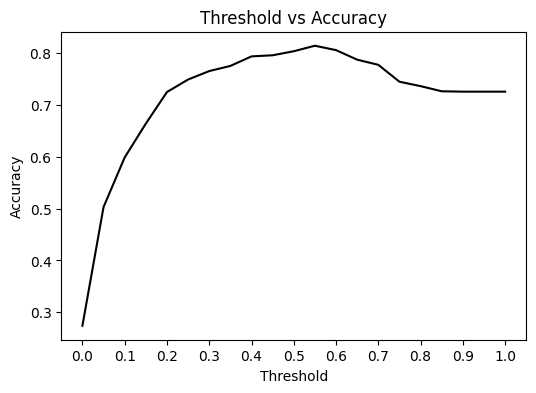

In [ ]:
plt.figure(figsize=(6,4))

plt.plot(thresholds,accuracies,color='black')
plt.title('Threshold vs Accuracy')
plt.xlabel('Threshold')
plt.ylabel('Accuracy')
plt.xticks(np.linspace(0,1,11))

plt.show()

In [ ]:
churn_small = y_pred_small >= 0.5
(churn_small == y_val).mean()

np.float64(0.7608232789212207)

In [ ]:
accuracy_score(y_val, churn_small)

0.7608232789212207

In [ ]:
size_val = len(y_val)
baseline = np.repeat(False, size_val)
baseline

array([False, False, False, ..., False, False, False])

In [ ]:
accuracy_score(baseline,y_val)

0.7260468417317246